# Example: Clothes Classification Using Fashion_MNIST dataset


We welcome you to this level1 that is about image classification with machine learning.

We will introduce chemistry students to image classification with machine learning. In this example, we will introduce the basic Convolutional neural network (CNN) model to classify Fashion_MNIST dataset, which contains 28x28 grayscale images of 10 fashion categories. From this notebook, you will understand the basic workflow to train and evaluate the model and use the model to predict clothes categories(inference). 


## Table of content

* Load images dataset
* Data preparation
* Build and train the model
* Evaluate the model
* Inference

# Load images dataset

At the begining, we will directly load the Fashion_MNIST dataset from keras. Fashion_MNIST is a popular dataset that is used for image classification. More details about this dataset can be found on the website: https://keras.io/api/datasets/fashion_mnist/.


In [ ]:
# import packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Data preparation

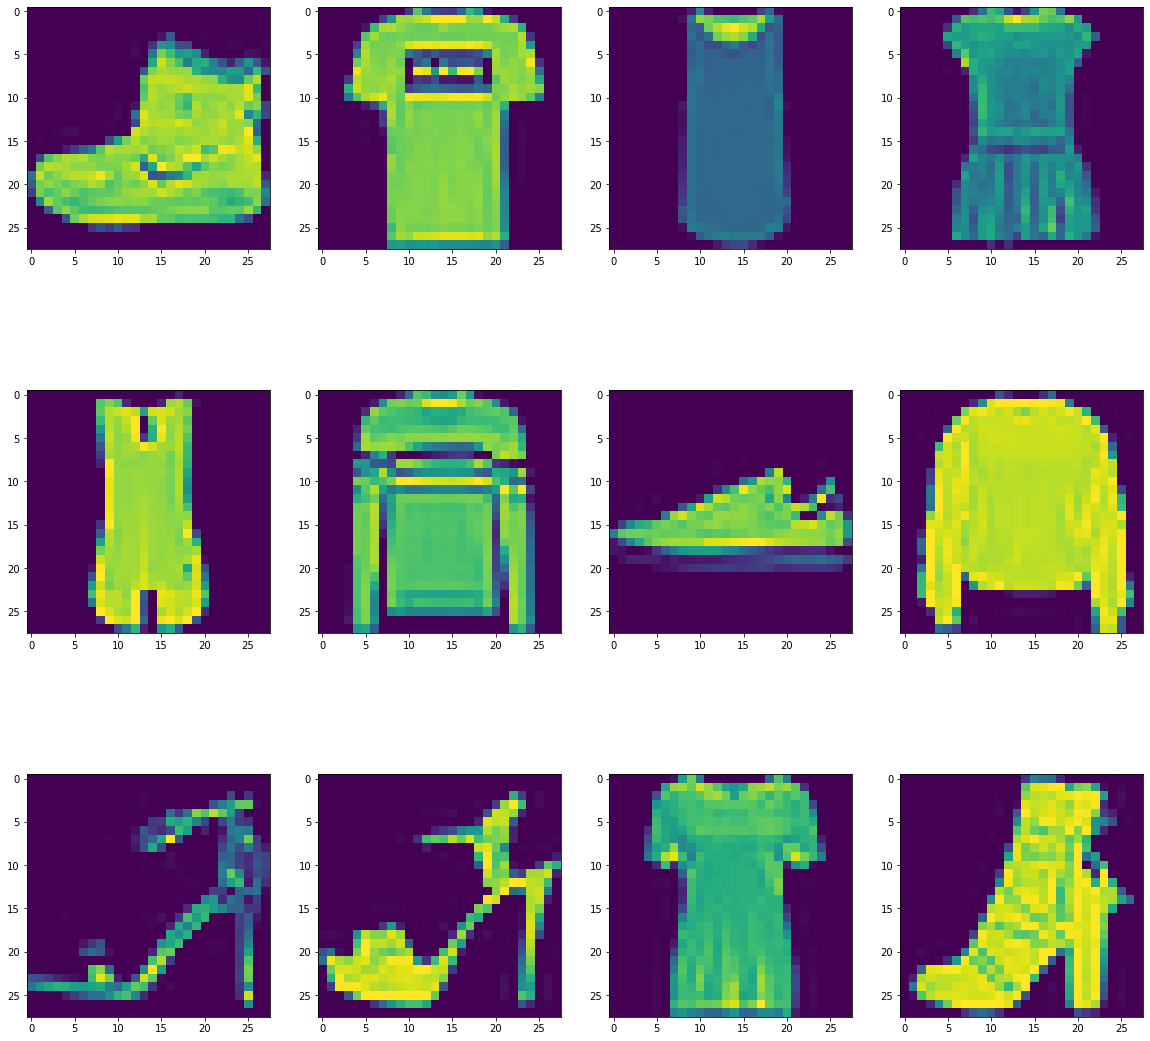

In [ ]:
# Visualize the dataset
fig,axes = plt.subplots(3,4,figsize=(20, 20))

j = 0
for i,img in enumerate(X_train_full[:12]):
    axes[i//4,j%4].imshow(img)
    j+=1

In [ ]:
# Data preparation

# split the X_train_full into X_train and X_valid
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# normalize the dataset
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train_norm = (X_train - X_mean) / X_std
X_valid_norm = (X_valid - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std

X_train_norm = X_train_norm[..., np.newaxis]
X_valid_norm = X_valid_norm[..., np.newaxis]
X_test_norm = X_test_norm[..., np.newaxis]

# Build and train the model

Currently, there are many machine learning (ML) model structures that can be used. Here, we provide two simple ML models. The first one is a sequentail model. This is the simplest kind of Keras model for neural networks that are composed of just a single stack of layers, connected sequentally. The second is a simple convolutional neural network (CNN) model. 


You can comment out this block of code to run this simplest sequential model to compare the difference between sequentail model and CNN model. 

In [ ]:
# Build the model (sequential)

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28, 1]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Build the model (sequential CNN model)
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
# Train the model
history = model.fit(X_train_norm, y_train, epochs=10, validation_data=[X_valid, y_valid])

Epoch 1/10
1719/1719 [==============================] - 28s 9ms/step - loss: 0.7186 - accuracy: 0.7502 - val_loss: 0.3844 - val_accuracy: 0.8604
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4336 - accuracy: 0.8549 - val_loss: 0.3383 - val_accuracy: 0.8698
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3718 - accuracy: 0.8747 - val_loss: 0.3104 - val_accuracy: 0.8854
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3336 - accuracy: 0.8879 - val_loss: 0.3015 - val_accuracy: 0.8910
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3091 - accuracy: 0.8956 - val_loss: 0.2887 - val_accuracy: 0.8914
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2983 - accuracy: 0.8985 - val_loss: 0.2904 - val_accuracy: 0.8980
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2875 - accuracy: 0.9036 - val_loss: 0.2794 - val_ac

# Evaluate the model

In [ ]:
# visualize the model structure with model.summary(). Feel free to comment out the code below to visualize the model structure

# model.summary()

The test dataset is not used for training and validation, which means the images are new to the trained model. We will use it to get the performance of the model. The performance is acceptable because the accuracy for the test dataset is nearly the same as the accuracy for the train and validation dataset.

In [ ]:
# Using test dataset to evaluate loss and accuracy for trained model
results = model.evaluate(X_test_norm, y_test, batch_size=128)

79/79 [==============================] - 1s 8ms/step - loss: 0.3050 - accuracy: 0.8978


At the end of epoch, the accuary of trainning dataset and validation dataset should be close. This is an easy way to determine if there is overfitting or not. 

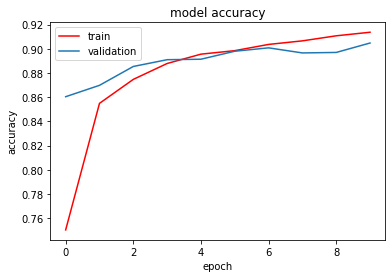

In [ ]:
# plot accuracy vs epoch
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left') 
plt.show()

# Inference

We visualize the image and use our judgement to see what piece of clothes it is and then compare it to the model prediction.



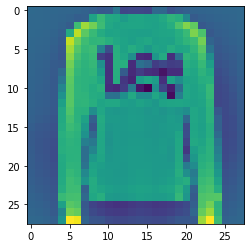

In [ ]:
# Visualize one image, X_test[x]. Here we choose X_test[1]. You can choose any of the images among all test dataset (10,000 images)
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing import image

img1 = X_test[1]
plt.imshow(img1)


The class labels are collected from the website: https://keras.io/api/datasets/fashion_mnist/. Then we will predict the image above with model.predict() function to see if it matches with your judgement.

In [ ]:
class_label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# image process
x = image.img_to_array(X_test_norm[1])
x = np.expand_dims(x, axis=0)

# predict the X_test[1] with model.predict()
y_prob = model.predict(x)
print("probality for each of the catogaries: ", y_prob)
y_class = y_prob.argmax(axis=-1)
# print("cloth index", y_class)
print("cloth catogaries the model predict: ", class_label[y_class[0]])

probality for each of the catogaries:  [[1.8640243e-09 2.6676890e-20 9.9977750e-01 1.1433950e-14 5.0992046e-05
  4.5123544e-23 1.7151995e-04 1.9939859e-28 8.6324733e-16 2.8405919e-23]]
cloth catogaries the model predict:  Pullover
